This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray Rainbow5 backend

In this example, we read Rainbow5 data files using the xradar `rainbow` xarray backend.

In [1]:
import glob
import gzip
import io
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load Rainbow5 Volume Data

In [2]:
fpath = "rainbow/2013051000000600dBZ.vol"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_rainbow_datatree(f, reindex_angle=False)

## Inspect RadarVolume

In [3]:
display(vol)

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 14)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2013-05-10T00:00:06Z'
│       time_coverage_end    <U20 80B '2013-05-10T00:03:14Z'
│       longitude            float64 8B 6.38
│       altitude             float64 8B 116.7
│       latitude             float64 8B 50.86
│       sweep_group_name     (sweep) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
│       sweep_fixed_angle    (sweep) float64 112B 0.6 1.4 2.4 3.5 ... 21.3 25.4 30.0
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:15.50000...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5055 1.549 2.505 ... 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float64 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_1
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:25.62121...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5055 1.549 2.516 ... 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float64 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_2
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:36.65151...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.511 1.505 2.505 ... 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float64 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_3
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:46.77272...
│           longitude          float64 8B ...
│           latitude      

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 14)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2013-05-10T00:00:06Z'
│       time_coverage_end    <U20 80B '2013-05-10T00:03:14Z'
│       longitude            float64 8B 6.38
│       altitude             float64 8B 116.7
│       latitude             float64 8B 50.86
│       sweep_group_name     (sweep) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
│       sweep_fixed_angle    (sweep) float64 112B 0.6 1.4 2.4 3.5 ... 21.3 25.4 30.0
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:15.50000...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5055 1.549 2.505 ... 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float64 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_1
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:25.62121...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5055 1.549 2.516 ... 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float64 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_2
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:36.65151...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.511 1.505 2.505 ... 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float64 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_3
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│         * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:46.77272...
│           longitude          float64 8B ...
│           latitude      

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 14, azimuth: 361, range: 400)
    Coordinates:
        elevation          (azimuth) float64 3kB ...
      * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
        time               (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:15.50000...
        longitude          float64 8B ...
        latitude           float64 8B ...
        altitude           float64 8B ...
      * azimuth            (azimuth) float64 3kB 0.5055 1.549 2.505 ... 358.5 359.5
    Dimensions without coordinates: sweep
    Data variables:
        DBZH               (azimuth, range) float64 1MB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float64 8B ...

## Georeferencing

In [6]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset.

In [7]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 361, range: 400)> Size: 1MB
[144400 values with dtype=float64]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
    elevation   (azimuth) float64 3kB 0.6 0.6 0.6 0.6 0.6 ... 0.6 0.6 0.6 0.6
  * range       (range) float32 2kB 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
    time        (azimuth) datetime64[ns] 3kB 2013-05-10T00:00:15.500000 ... 2...
    longitude   float64 8B 6.38
    latitude    float64 8B 50.86
    ...          ...
    y           (azimuth, range) float64 1MB 125.0 375.0 ... 9.96e+04 9.985e+04
    z           (azimuth, range) float64 1MB 118.0 120.6 ... 1.745e+03 1.75e+03
    gr          (azimuth, range) float64 1MB 124.8 374.7 ... 9.96e+04 9.985e+04
    rays        (azimuth, range) float64 1MB 0.5055 0.5055 ... 359.5 359.5
    bins        (azimuth, range) float32 578kB 125.0 375.0 ... 9.988e+04
    crs_wkt     int64 8B 0
Attributes:
    standard_name:  radar_equivalent_reflectivity_factor_h
    units:          dBZ
    long_name:      Equivalent reflectivity factor H

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

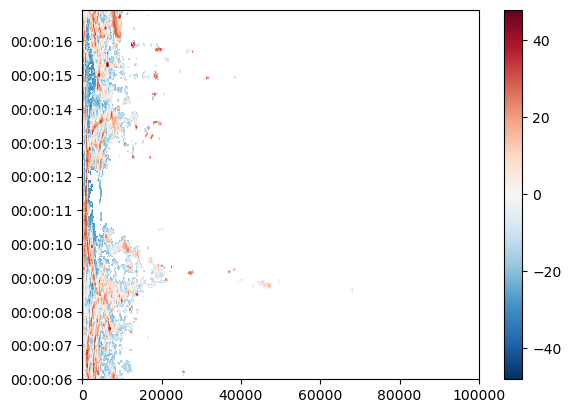

In [8]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

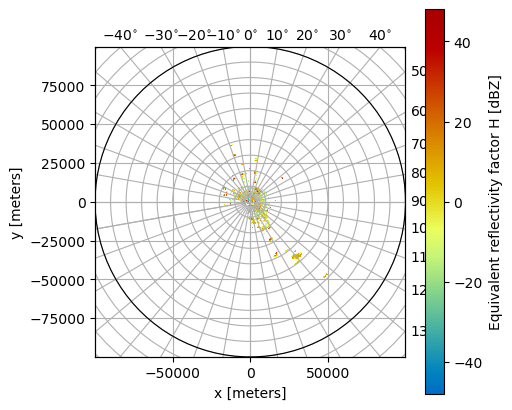

In [9]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## Retrieve explicit group

In [10]:
swp_b = xr.open_dataset(
    f, engine="rainbow", group="sweep_5", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset> Size: 1MB
Dimensions:            (azimuth: 361, range: 400)
Coordinates:
    elevation          (azimuth) float64 3kB ...
  * range              (range) float32 2kB 125.0 375.0 ... 9.962e+04 9.988e+04
    time               (azimuth) datetime64[ns] 3kB ...
    longitude          float64 8B ...
    latitude           float64 8B ...
    altitude           float64 8B ...
  * azimuth            (azimuth) float64 3kB 0.522 1.505 2.516 ... 358.5 359.5
Data variables:
    DBZH               (azimuth, range) float64 1MB ...
    sweep_mode         <U20 80B ...
    sweep_number       int64 8B ...
    prt_mode           <U7 28B ...
    follow_mode        <U7 28B ...
    sweep_fixed_angle  float64 8B ...